--- VERIFICA PERCORSI ---
✅ File trovati correttamente in 'data/'


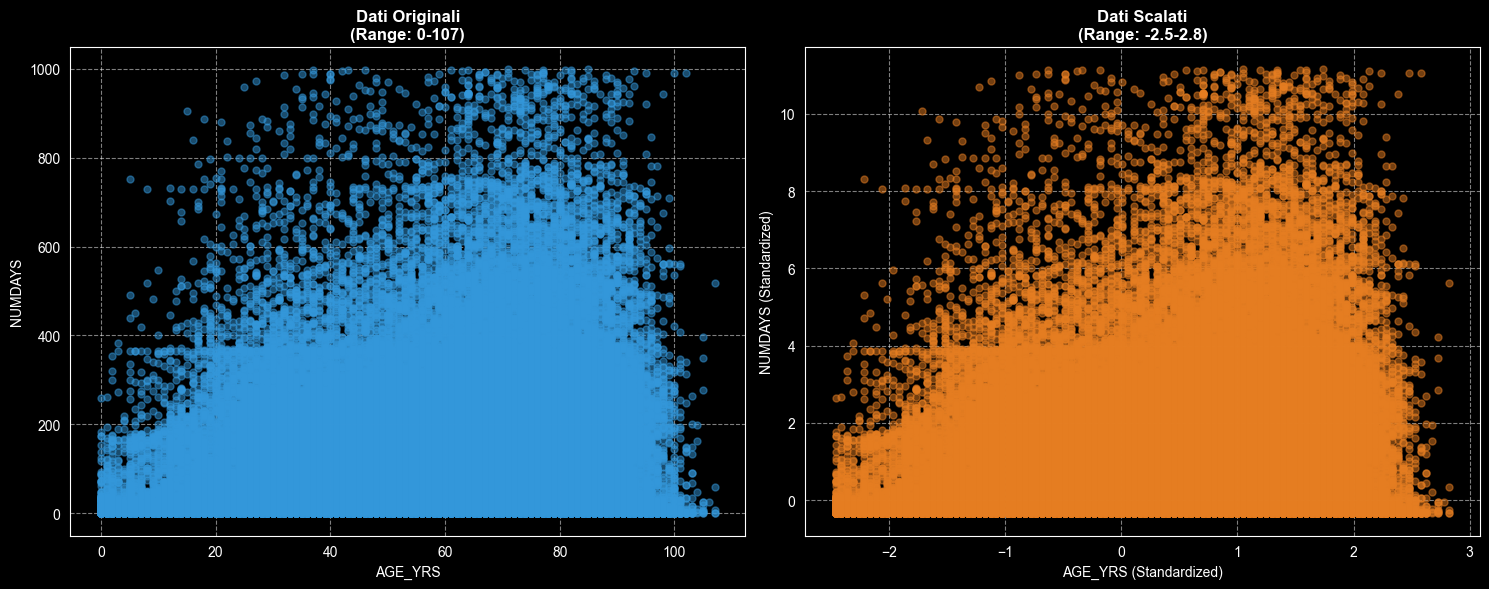

🎉 Grafico creato e salvato come 'confronto_scaling_vaers.png'!


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 1. SETUP PERCORSI (Entrambi i file sono nella cartella superiore 'dataset')
# Usiamo '../' per risalire dalla cartella 'scaled'
FILE_ORIGINALE = '../train_step5.csv'
FILE_SCALATO = '../train_step3_ready.csv'

print("--- VERIFICA PERCORSI ---")
if os.path.exists(FILE_ORIGINALE) and os.path.exists(FILE_SCALATO):
    print("✅ File trovati correttamente in 'data/'")

    # Caricamento dati
    df_orig = pd.read_csv(FILE_ORIGINALE)
    df_scale = pd.read_csv(FILE_SCALATO)

    # 2. SELEZIONE DELLE COLONNE
    # Assicurati che questi nomi siano corretti (es. AGE_YRS)
    col_x = 'AGE_YRS'
    col_y = 'NUMDAYS' # Se questa colonna non esiste, usa un'altra numerica

    if col_x in df_orig.columns and col_y in df_orig.columns:

        # 3. GENERAZIONE GRAFICI
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Grafico 1: Dati Originali
        ax1.scatter(df_orig[col_x], df_orig[col_y], alpha=0.5, color='#3498db', s=25)
        ax1.set_title(f'Dati Originali\n(Range: {df_orig[col_x].min():.0f}-{df_orig[col_x].max():.0f})', fontweight='bold')
        ax1.set_xlabel(col_x)
        ax1.set_ylabel(col_y)
        ax1.grid(True, linestyle='--', alpha=0.5)

        # Grafico 2: Dati Scalati
        ax2.scatter(df_scale[col_x], df_scale[col_y], alpha=0.5, color='#e67e22', s=25)
        ax2.set_title(f'Dati Scalati\n(Range: {df_scale[col_x].min():.1f}-{df_scale[col_x].max():.1f})', fontweight='bold')
        ax2.set_xlabel(f'{col_x} (Standardized)')
        ax2.set_ylabel(f'{col_y} (Standardized)')
        ax2.grid(True, linestyle='--', alpha=0.5)

        plt.tight_layout()
        # Salva l'immagine per la tua presentazione
        plt.savefig('confronto_scaling_vaers.png', dpi=300)
        plt.show()
        print("🎉 Grafico creato e salvato come 'confronto_scaling_vaers.png'!")
    else:
        print(f"❌ Errore: Colonne '{col_x}' o '{col_y}' non trovate.")
        print(f"Colonne disponibili: {df_orig.columns.tolist()[:10]}...") # Mostra le prime 10
else:
    print("❌ Ancora problemi con i file.")
    print(f"Percorso originale cercato: {os.path.abspath(FILE_ORIGINALE)}")
    print(f"Percorso scalato cercato: {os.path.abspath(FILE_SCALATO)}")